# Electric Vehicles Market Size Analysis using Python

Market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. So, if you want to learn how to perform a market size analysis of any product, this article is for you. In this article, I’ll take you through the task of Electric Vehicles market size analysis using Python.

#### The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ev_df = pd.read_csv(r"C:\Users\prmma\OneDrive\Desktop\EV-data\Dataset\Electric_Vehicle_Population_Data.csv")

In [3]:
# read the dataset
ev_df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


# 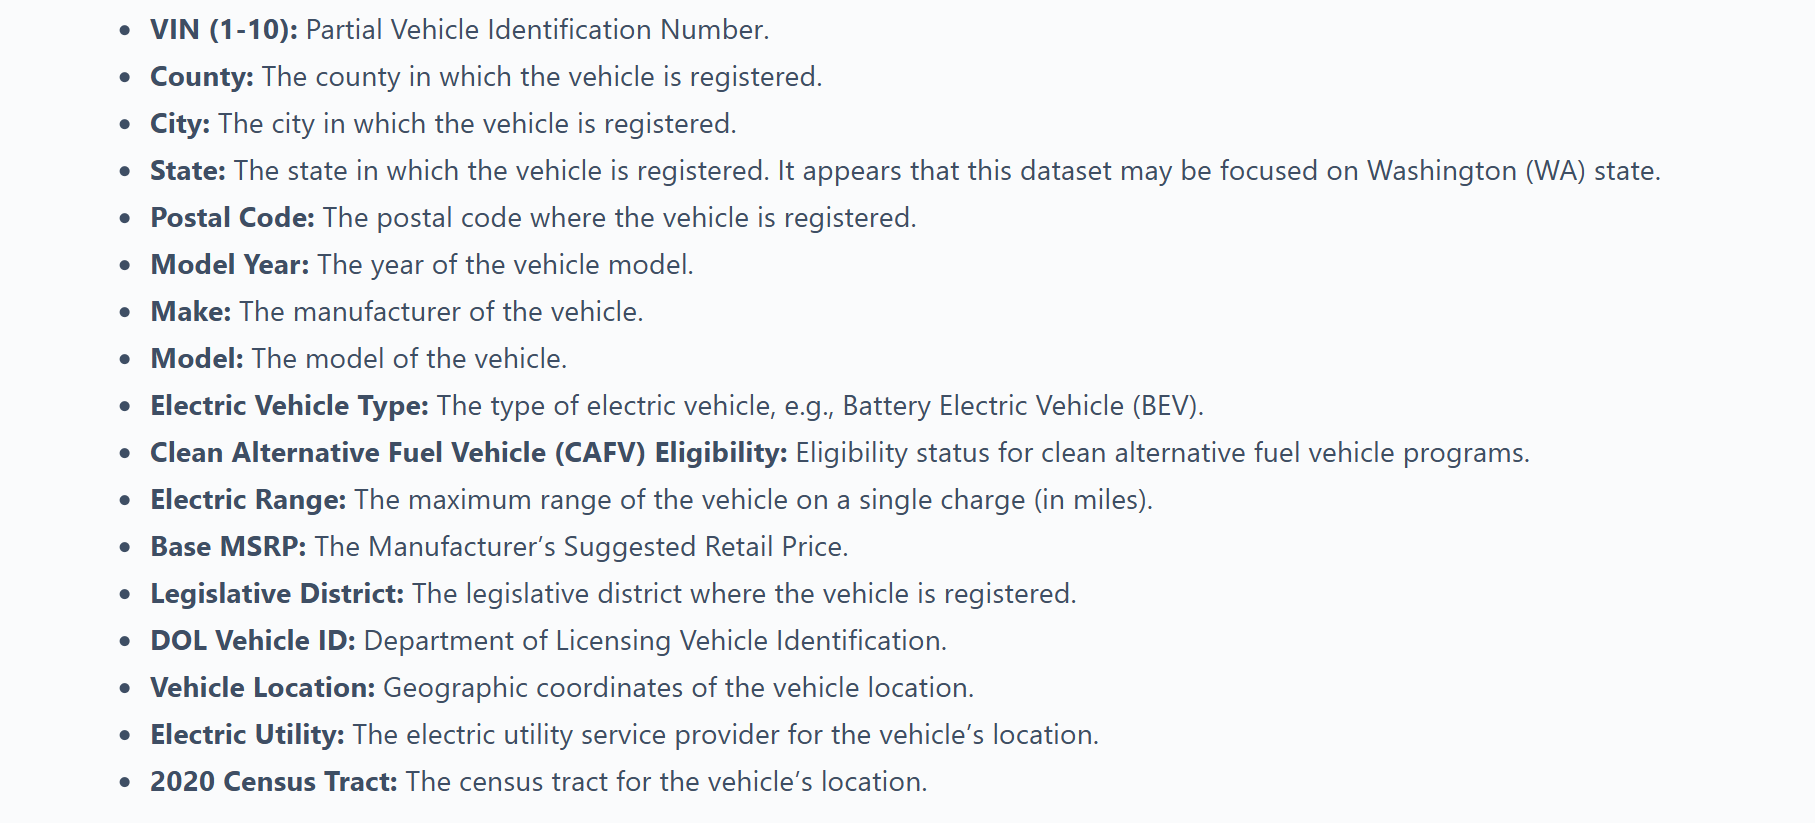

#### this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward:

In [4]:
ev_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
# SHow information
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
ev_df.shape

(177866, 17)

In [7]:
# Conversion --  i converted Miles to Km and droped this columns because of easy to under of km range
miles_to_km = 1.60934
# Convert Electric Range from miles to kilometers
ev_df['Electric_range_KM'] = ev_df['Electric Range'] * miles_to_km
print(ev_df[['Electric Range', 'Electric_range_KM']].head())

   Electric Range  Electric_range_KM
0             291          468.31794
1               0            0.00000
2             270          434.52180
3             210          337.96140
4               0            0.00000


In [8]:
# ev_df.drop(columns=['Electric Range'], inplace=True)

In [9]:
ev_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Electric_range_KM
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05,177866.000000
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10,94.697045
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09,148.029182
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09,0.000000
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10,0.000000
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10,0.000000
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10,120.700500
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10,542.347580


In [10]:
ev_df['Model Year']

0         2020
1         2023
2         2019
3         2016
4         2021
          ... 
177861    2022
177862    2023
177863    2021
177864    2021
177865    2021
Name: Model Year, Length: 177866, dtype: int64

In [11]:
ev_df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
Electric_range_KM              

In [12]:
# drop Null Values because of 300+ Rowa  is not Too much important
ev_df.dropna(inplace = True)

In [13]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

In [14]:
ev_df.shape

(177473, 18)

Text(0, 0.5, 'Count')

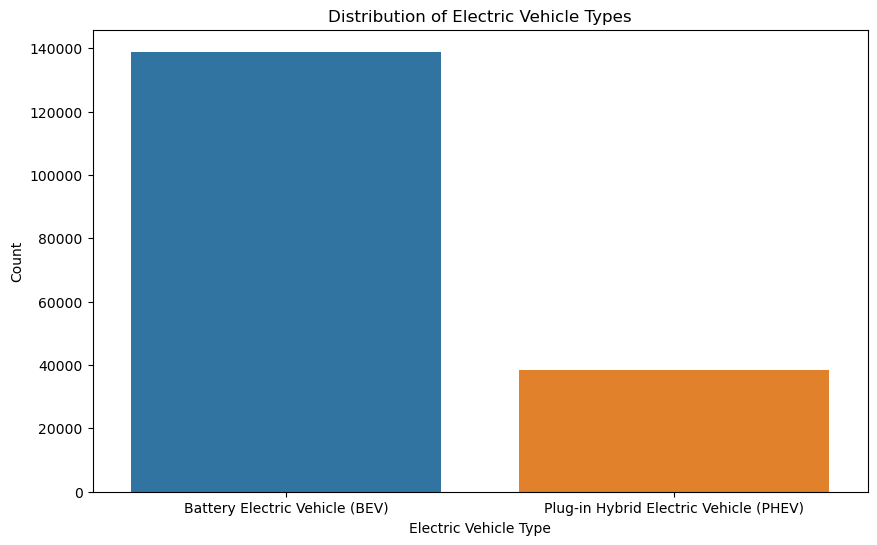

In [15]:
# Distribution of Electric Vehicle Types
# Distribution of Electric Vehicle Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=ev_df)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')

# top 10 hight Ev Regitered Vechical Cities and State

In [16]:
city_counts = ev_df.groupby(['City', 'State', 'Postal Code']).size().reset_index(name='EV_Registrations')

# Get top cities by EV registrations
top_cities = city_counts.sort_values(by='EV_Registrations', ascending= False).head(10)
top_cities

,City,State,Postal Code,EV_Registrations
481,Redmond,WA,98052.0,4566
276,Kirkland,WA,98033.0,2987
36,Bellevue,WA,98006.0,2823
542,Seattle,WA,98115.0,2717
52,Bothell,WA,98012.0,2634
685,Tukwila,WA,98188.0,2549
520,Sammamish,WA,98074.0,2525
277,Kirkland,WA,98034.0,2353
351,Mercer Island,WA,98040.0,2344
742,Woodinville,WA,98072.0,2272


# There is lots of Ev car Regitered in Redmond,WA 

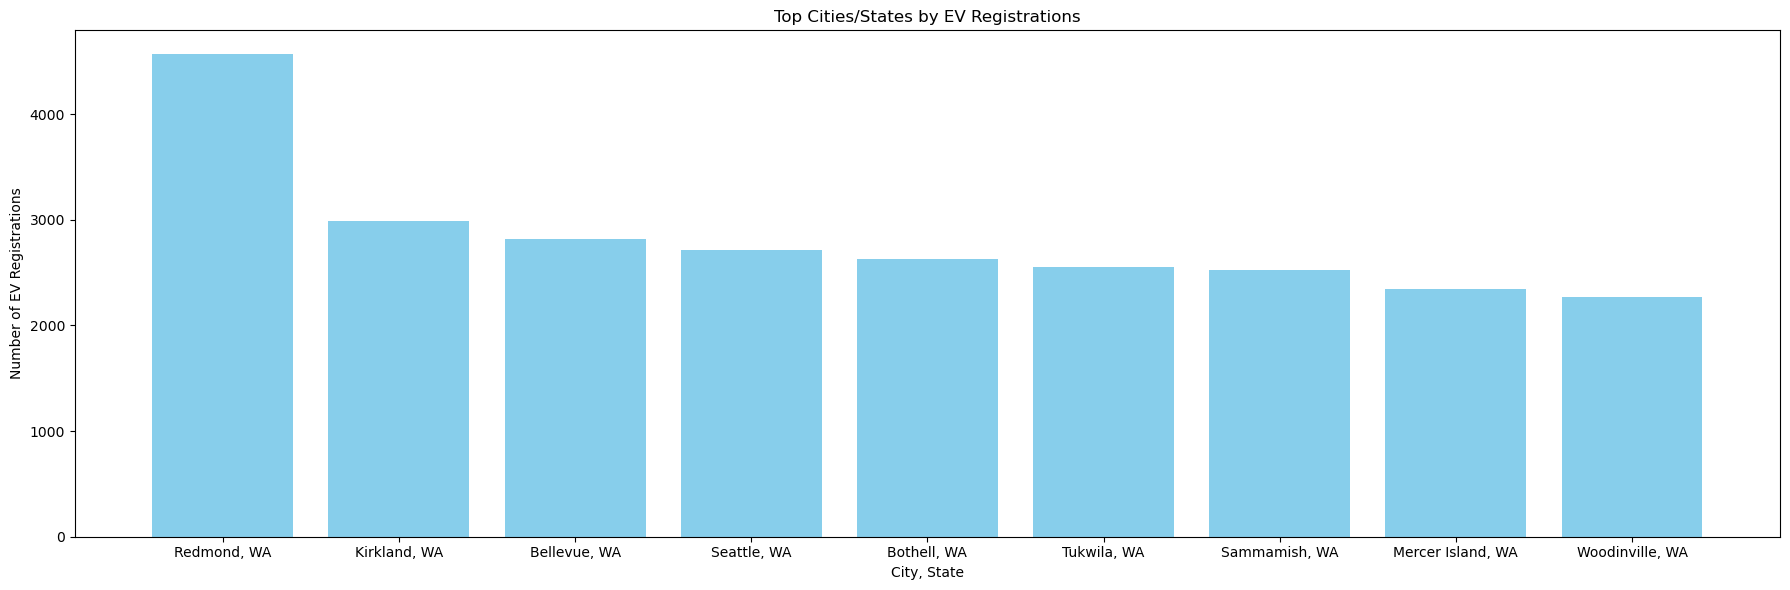

In [17]:
plt.figure(figsize=(18, 6))
plt.bar(top_cities['City'] + ', ' + top_cities['State'], top_cities['EV_Registrations'], color='skyblue')
plt.xlabel('City, State')
plt.ylabel('Number of EV Registrations')
plt.title('Top Cities/States by EV Registrations')
plt.tight_layout()

# there are 2 Types electric vehicle 

In [18]:
ev_df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

# Geographical Distribution

In [19]:
# Geographical Distribution
top_counties = ev_df['County'].value_counts().head(10)
top_cities = ev_df['City'].value_counts().head(10)
top_states = ev_df['State'].value_counts().head(10)
top_counties

County
King         92740
Snohomish    21001
Pierce       13782
Clark        10409
Thurston      6428
Kitsap        5840
Spokane       4586
Whatcom       4253
Benton        2147
Skagit        1910
Name: count, dtype: int64

# Vehicle Characteristics

In [20]:
# Vehicle Characteristics
ev_types = ev_df['Electric Vehicle Type'].value_counts()
make_models = ev_df.groupby(['Make', 'Model']).size().reset_index(name='Count')
make_models

,Make,Model,Count
0,ALFA ROMEO,TONALE,39
1,AUDI,A3,548
2,AUDI,A7,13
3,AUDI,A8 E,3
4,AUDI,E-TRON,1088
...,...,...,...
134,VOLVO,V60,46
135,VOLVO,XC40,1005
136,VOLVO,XC60,1066
137,VOLVO,XC90,1420


# Ditrubution of Electric Vehicle Type', _'Electric Range

Text(0, 0.5, 'Electric Vehicle Type')

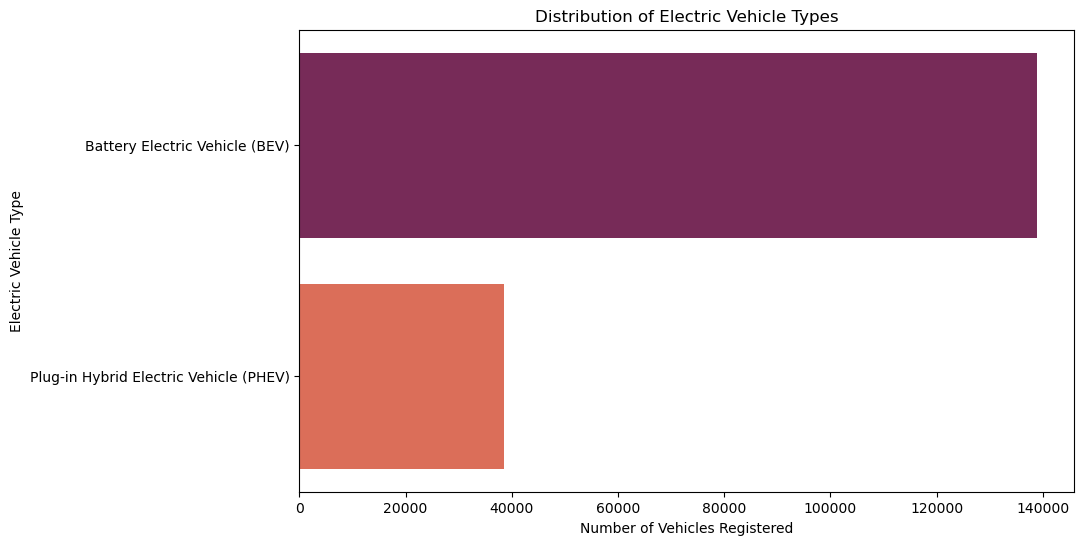

In [21]:
ev_type_distribution = ev_df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')

### Electric Range and Base MSRP analysis

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric_range_KM'>

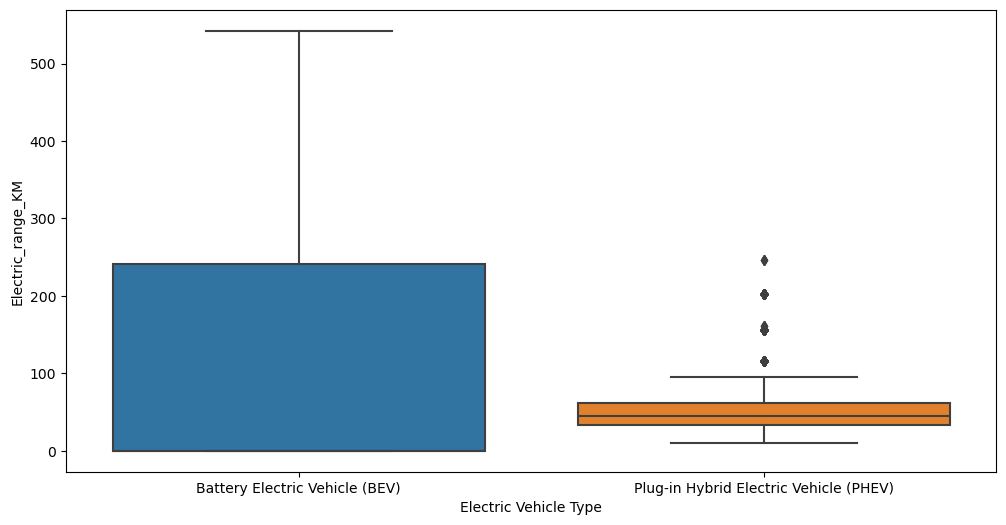

In [22]:
# Electric Range and Base MSRP analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric_range_KM', data=ev_df)

### analyzing the distribution of electric range

C:\Users\prmma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


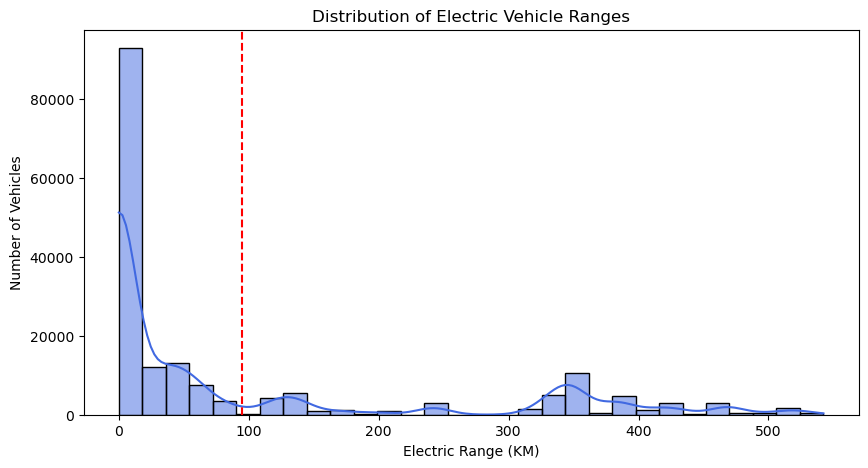

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(ev_df['Electric_range_KM'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (KM)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_df['Electric_range_KM'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_df["Electric_range_KM"].mean():.2f} miles')

#### There is a high frequency of vehicles with a low electric range, with a significant peak occurring just below 100 KM.
#### The mean electric range for this set of vehicles is marked at approximately 92 KM, which is relatively low compared to the highest ranges shown in the graph.

# Base MSRP analysis The manufacturer's suggested retail price (MSRP) is the price that a product's manufacturer recommends it be sold for at the point of sale.

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

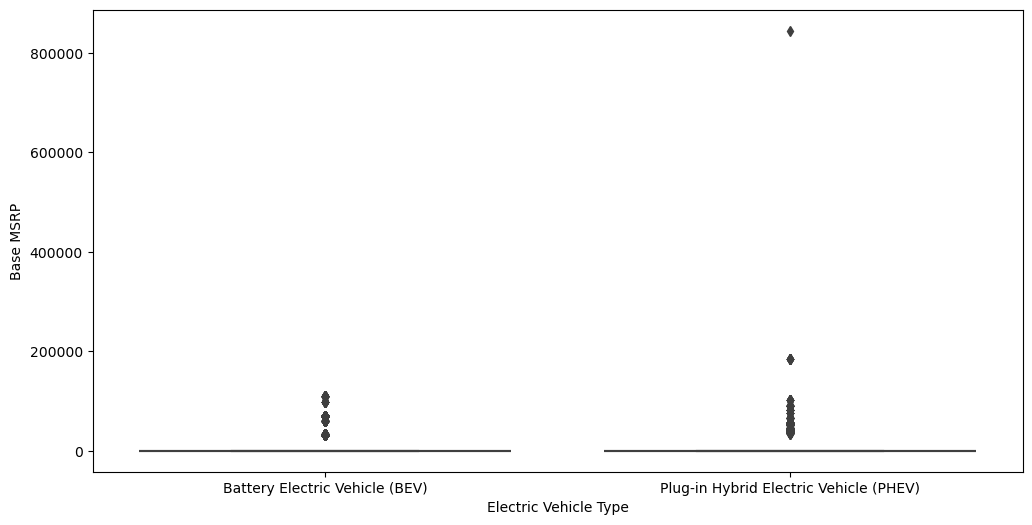

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=ev_df)

Text(0, 0.5, 'Base MSRP')

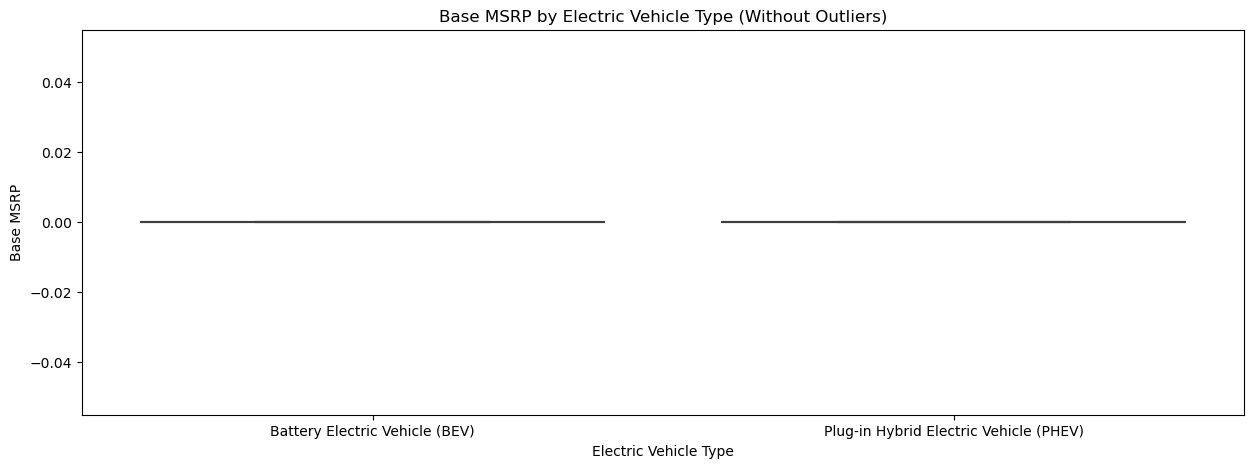

In [25]:

# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from 'Base MSRP' column
ev_df_no_outliers = remove_outliers(ev_df, 'Base MSRP')

# Create the boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=ev_df_no_outliers)
plt.title('Base MSRP by Electric Vehicle Type (Without Outliers)')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP')

In [26]:
ev_df['Electric Vehicle Type'].max()

'Plug-in Hybrid Electric Vehicle (PHEV)'

In [27]:
ev_df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_range_KM
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,468.31794


In [28]:
# what is the correaltion between the vehicle and MSRP
corr = ev_df[['Electric_range_KM', 'Base MSRP']]
correlation_matrix = corr.corr()
correlation_matrix

,Electric_range_KM,Base MSRP
Electric_range_KM,1.000000,0.108246
Base MSRP,0.108246,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

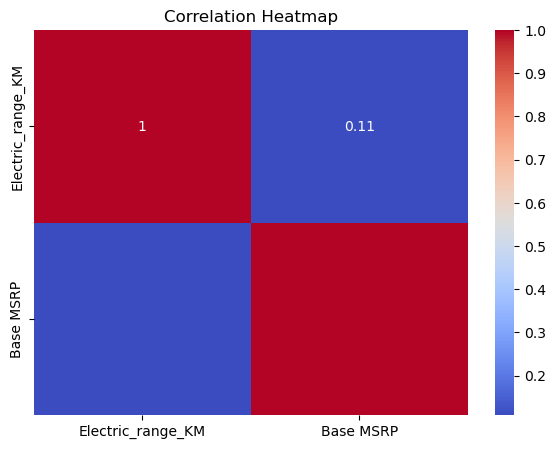

In [29]:
# Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

The diagonal elements are 1.000000, which is expected because the correlation of a variable with itself is always
#### 1.The correlation between 'Electric_range_KM' and 'Base MSRP' is 0.108246, indicating a weak positive correlation between these two variables.
Interpretation:
Weak Positive Correlation (0.108246):
The value 0.108246 suggests that there is a very slight positive relationship between the electric range of the vehicle and its base MSRP (Manufacturer's Suggested Retail Price).
This means that as the electric range increases, the base MSRP tends to increase slightly, but this relationship is not strong.

<Axes: xlabel='Electric_range_KM'>

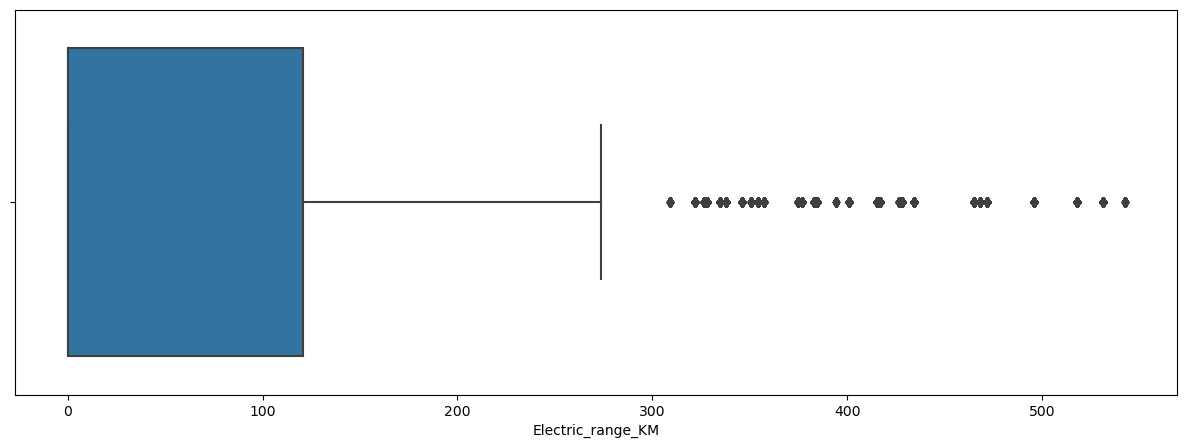

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Electric_range_KM', data=ev_df)

#### analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

# Model Year trend

Text(0, 0.5, 'Number of Registrations')

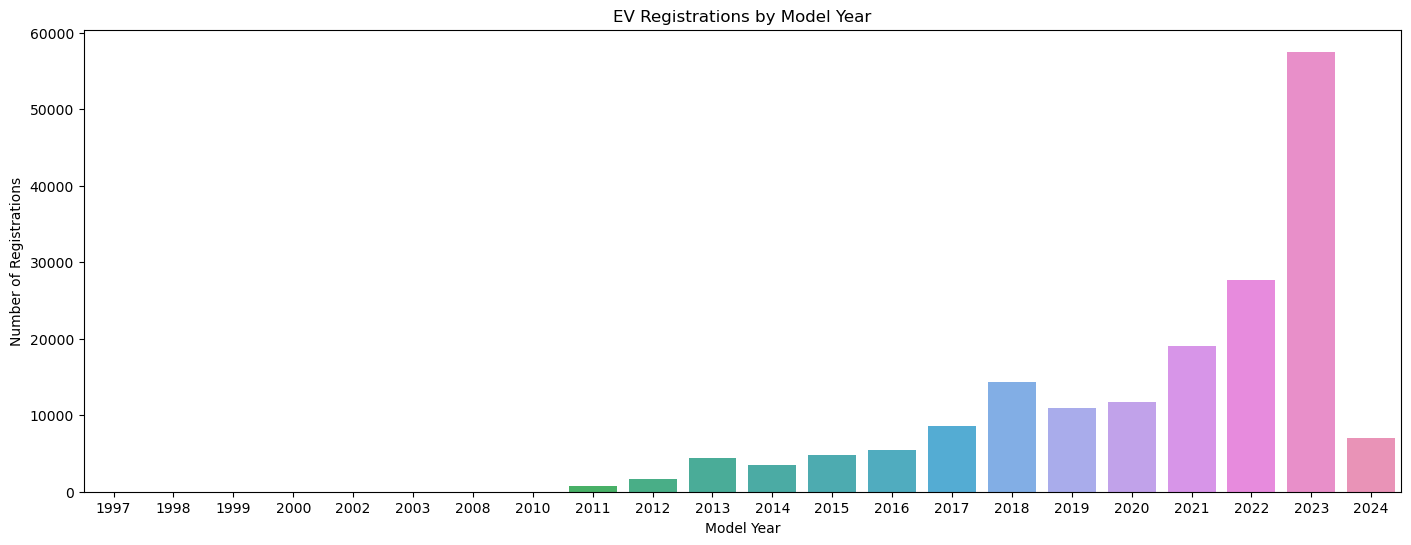

In [31]:
# Temporal Analysis - Model Year trend
plt.figure(figsize=(17, 6))
sns.countplot(x='Model Year', data=ev_df)
plt.title('EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')

# Utility and Regulatory Factors

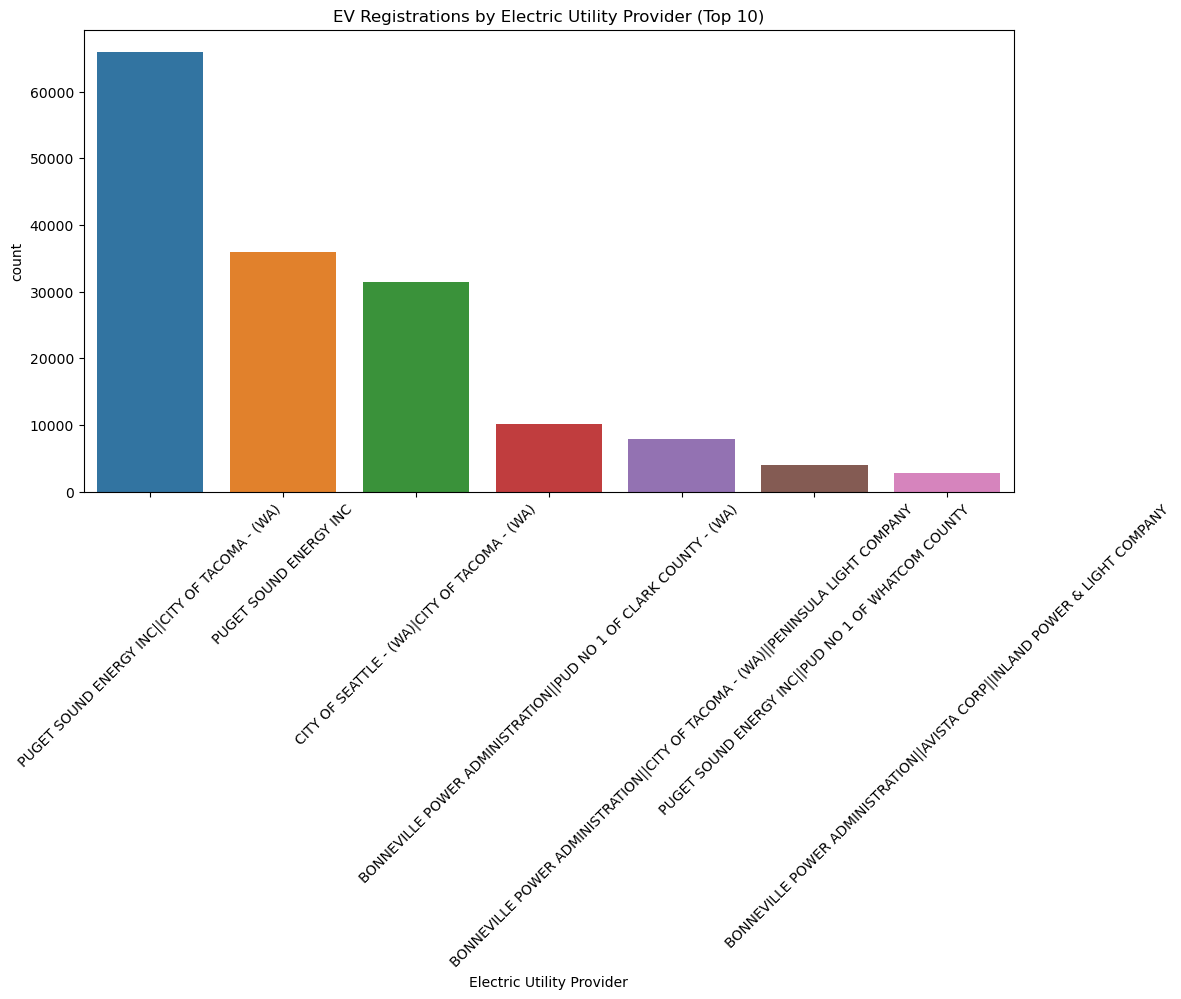

In [32]:
# plt.figure(figsize=(100, 50))

# Count the occurrences of each electric utility
utility_counts = ev_df['Electric Utility'].value_counts().head(7)

# Plotting the countplot with seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(x='Electric Utility', data=ev_df, order=utility_counts.index)
plt.title('EV Registrations by Electric Utility Provider (Top 10)')
plt.xlabel('Electric Utility Provider')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [33]:
ev_df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_range_KM
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,468.31794


# What is the Count of Make 

In [34]:
make_distrubution = ev_df.Make.value_counts().head(10)

Text(0, 0.5, 'Count of Electric Vehicle')

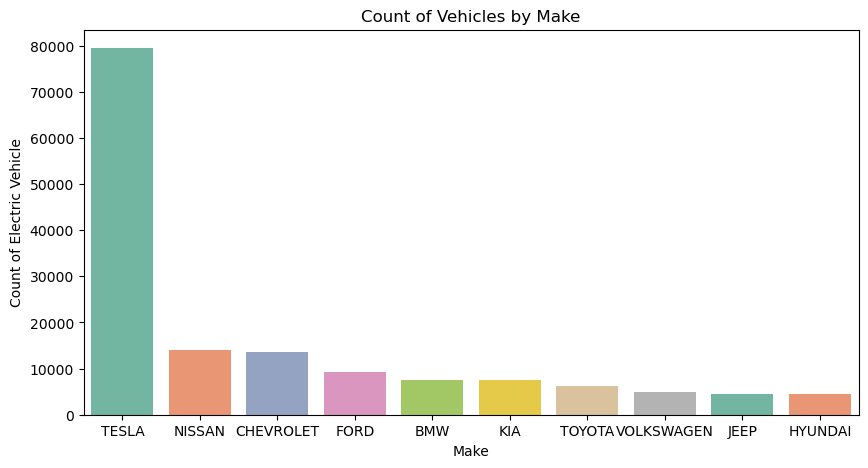

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Make', data=ev_df, order=ev_df['Make'].value_counts().head(10).index, palette='Set2')
plt.title('Count of Vehicles by Make')
plt.xlabel('Make')
plt.ylabel('Count of Electric Vehicle')

## the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

In [36]:
top_3_makes = make_distrubution.head(3).index

In [37]:
top_makes_data = ev_df[ev_df['Make'].isin(top_3_makes)]

In [38]:
ev_model_distribution_top_makes=top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

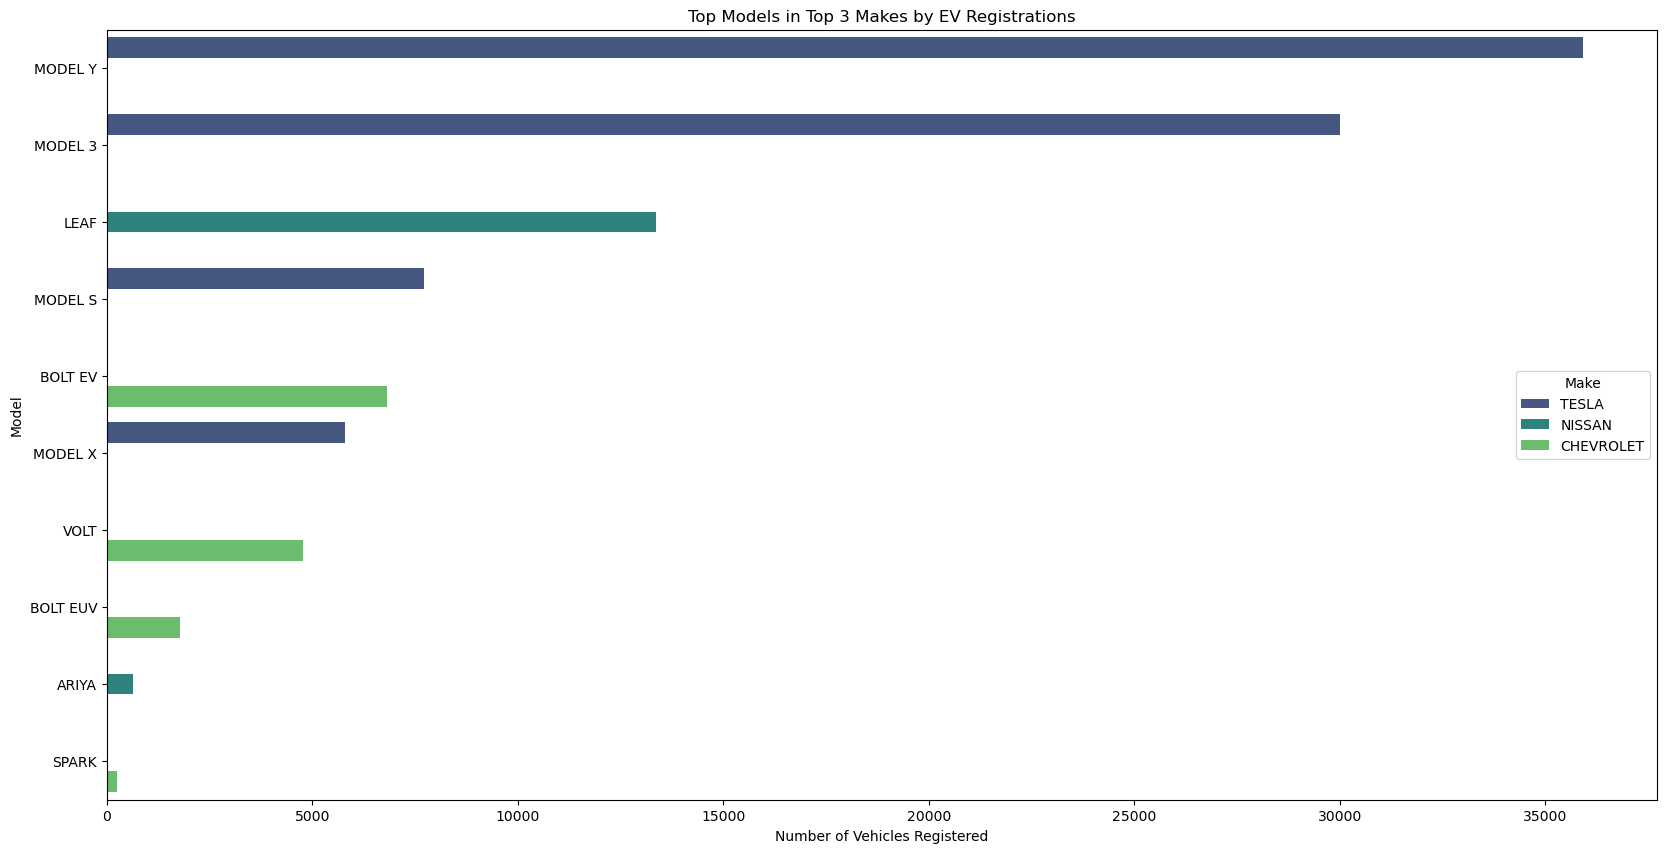

In [39]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')

In [40]:
average_model_range = ev_df.groupby(['Make','Model'])['Electric_range_KM'].mean().sort_values(ascending=False).reset_index()
average_model_range.head()

,Make,Model,Electric_range_KM
0,HYUNDAI,KONA,415.209720
1,TESLA,ROADSTER,377.670115
2,JAGUAR,I-PACE,327.889151
3,TESLA,MODEL S,284.522379
4,CHEVROLET,BOLT EV,249.217794


In [41]:
# the top 10 models with the highest average electric range
top_range_models = average_model_range.head(10)

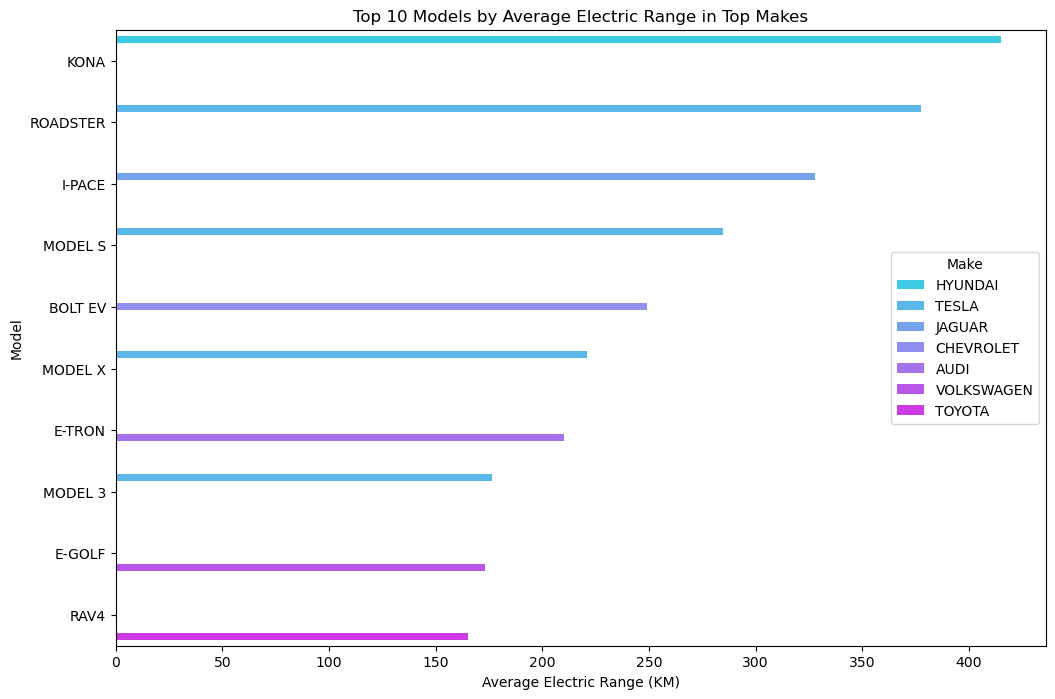

In [42]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric_range_KM', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (KM)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')

## calculating the average electric range by model year

In [43]:
average_model_range = ev_df.groupby("Model Year")['Electric_range_KM'].mean().reset_index()
average_model_range.head()

,Model Year,Electric_range_KM
0,1997,62.76426
1,1998,93.34172
2,1999,119.09116
3,2000,93.34172
4,2002,152.88730


C:\Users\prmma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prmma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Average Electric Range (KM)')

<Figure size 1500x500 with 0 Axes>

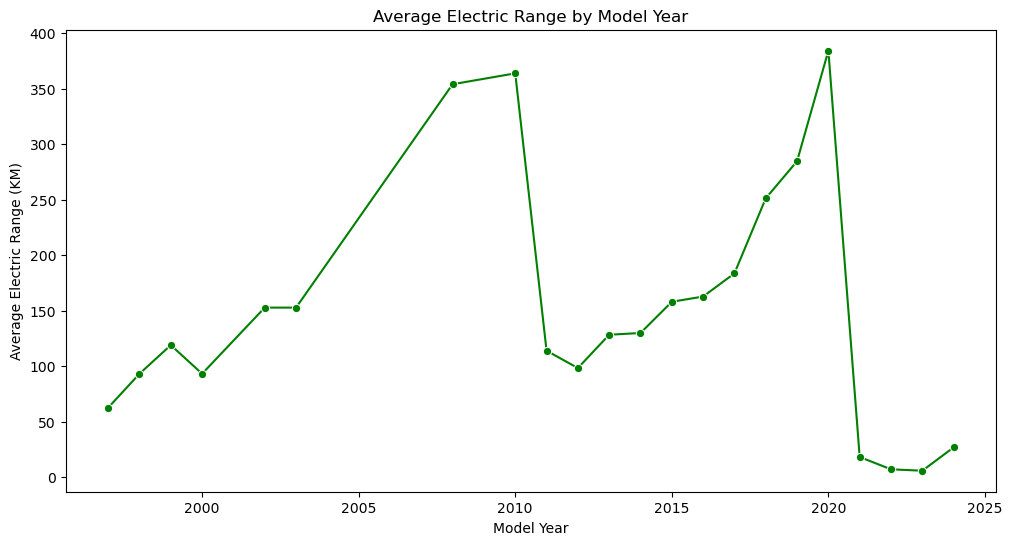

In [44]:
plt.figure(figsize=(15, 5))
# Bar plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric_range_KM', data=average_model_range, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (KM)')

# What is the MSRP By Make

In [45]:
group_make = ev_df.groupby('Make')['Base MSRP'].mean().sort_values(ascending = False).head(10)
group_make

Make
WHEEGO ELECTRIC CARS    32995.000000
FISKER                  25500.000000
MINI                     6527.394209
VOLVO                    4123.363240
PORSCHE                  4005.540897
BMW                      3504.294600
SUBARU                   2740.572289
KIA                      2578.357807
CADILLAC                 2569.039474
CHRYSLER                 1491.748992
Name: Base MSRP, dtype: float64

Text(0, 0.5, 'Average Base MSRP')

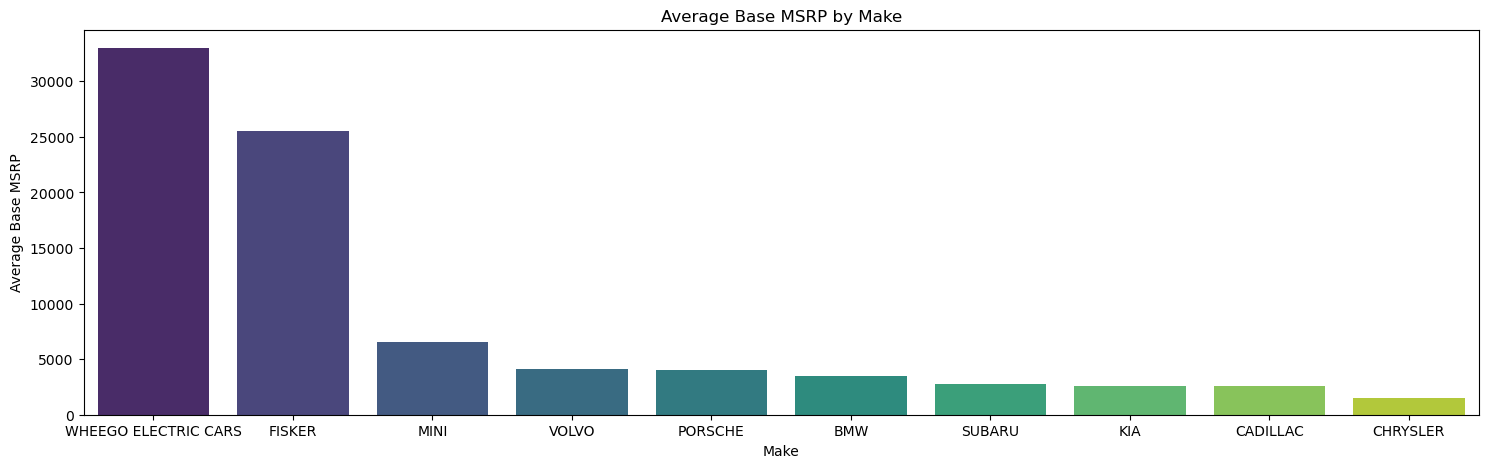

In [46]:
# Plotting the bar plot
plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
sns.barplot(x=group_make.index, y=group_make.values, palette='viridis')
plt.title('Average Base MSRP by Make')
plt.xlabel('Make')
plt.ylabel('Average Base MSRP')

### start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

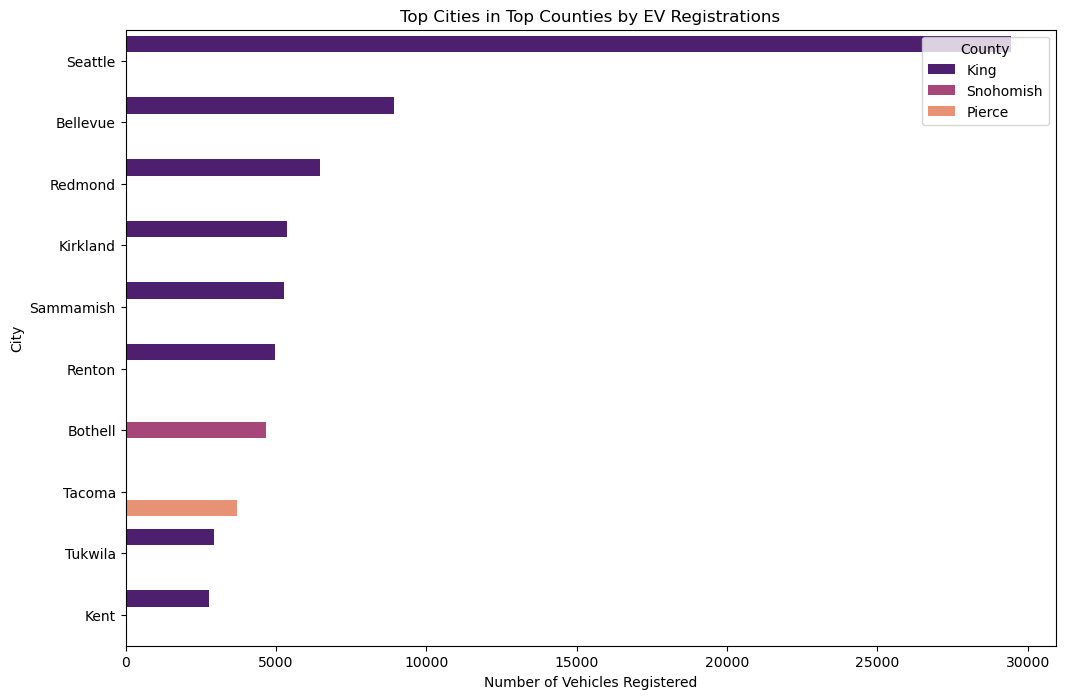

In [47]:
# geographical distribution at county level
ev_county_distribution = ev_df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_df[ev_df['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')

# Columns that may not be immediately necessary for forecasting EV registrations based on historical trends include:

In [48]:
#VIN (Vehicle Identification Number),CAFV (Clean Alternative Fuel Vehicle) Eligibility,Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract:#
ev_df.drop(columns=['VIN (1-10)','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Legislative District','DOL Vehicle ID','Vehicle Location','Electric Utility','2020 Census Tract'], inplace=True)

# Assess the historical growth trend of EV registrations.

In [49]:
ev_df.head(2)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP,Electric_range_KM
0,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),291,0,468.31794
1,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,0,0.00000


In [50]:
registration_counts = ev_df['Model Year'].value_counts().sort_index()
registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

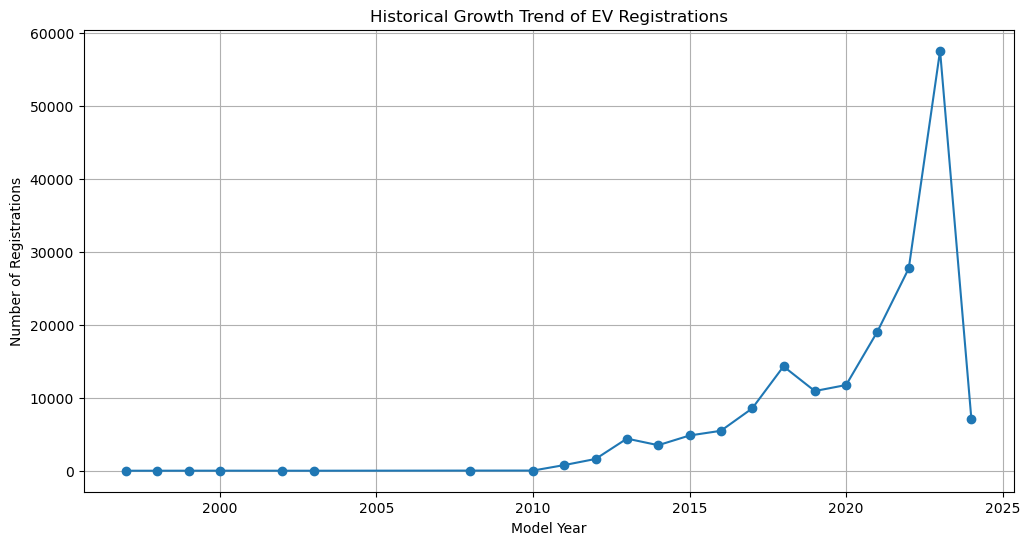

In [51]:
 # Plotting the historical growth trend
plt.figure(figsize=(12, 6))
plt.plot(registration_counts.index, registration_counts.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.title('Historical Growth Trend of EV Registrations')
plt.grid(True)

# Forecast future EV registrations based on historical trends.

In [52]:
#ARIMA (AutoRegressive Integrated Moving Average) model using is designed for time series forecasting.
from scipy.optimize import curve_fit
import numpy as np

In [53]:
#Aggregate by Model Year and relevant columns
df = ev_df.groupby('Model Year').agg({
    'Make': 'count',  # Count registrations
    'Base MSRP': 'mean',  # Average MSRP
    'Electric_range_KM': 'mean',  # Average electric range
}).reset_index()

In [54]:
df.head()

,Model Year,Make,Base MSRP,Electric_range_KM
0,1997,1,0.0,62.76426
1,1998,1,0.0,93.34172
2,1999,5,0.0,119.09116
3,2000,7,0.0,93.34172
4,2002,2,0.0,152.88730


In [55]:
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

# filter the dataset to include years with complete data, assuming 2023 is the last complete year

In [56]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = registration_counts[registration_counts.index <= 2023]
filtered_years

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
Name: count, dtype: int64

In [57]:
# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [58]:
# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values
print("x_data :",x_data)
print('y_data :',y_data)

x_data : Index([0, 1, 2, 3, 5, 6, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26],
      dtype='int64', name='Model Year')
y_data : [    1     1     5     7     2     1    19    23   775  1614  4399  3496
  4826  5469  8534 14286 10913 11740 19063 27708 57519]


In [59]:
# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)


In [60]:
# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)
print(forecast_years)
print(forecasted_values)

[27 28 29 30 31 32]
[ 79079.20808939 119653.96274429 181047.22020266 273940.74706209
 414497.01805382 627171.31284077]


In [61]:
# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
forecasted_evs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

In [62]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)
years

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029],
      dtype=int64)

In [63]:
# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]
print(actual_values)
print(forecasted_values)

[    1     1     5     7     2     1    19    23   775  1614  4399  3496
  4826  5469  8534 14286 10913 11740 19063 27708 57519]
[ 79079.20808939 119653.96274429 181047.22020266 273940.74706209
 414497.01805382 627171.31284077]


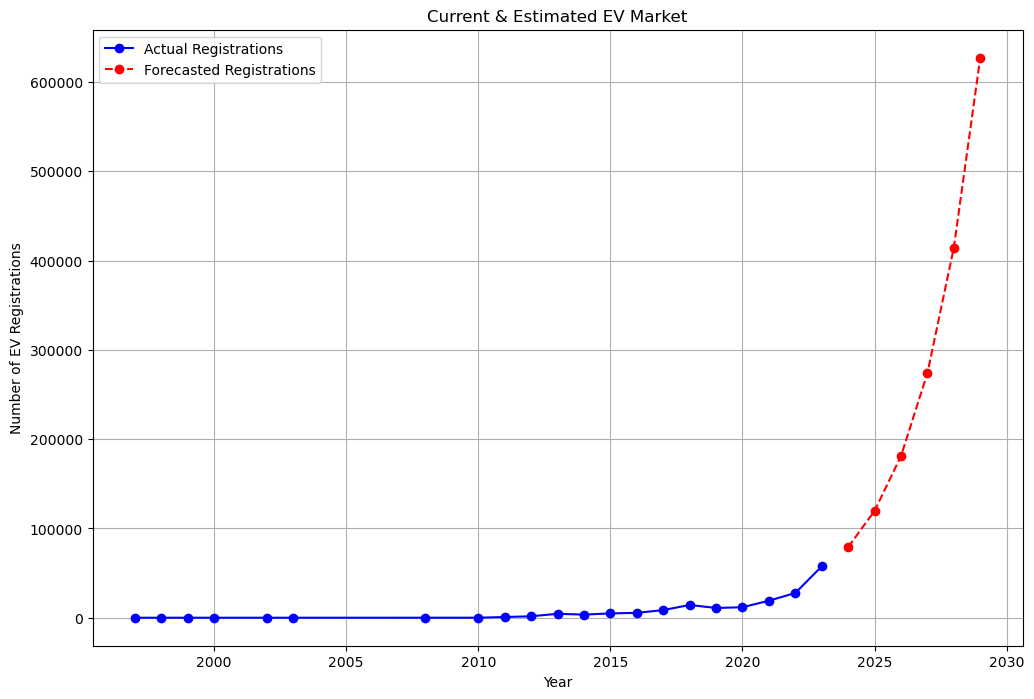

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

### Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.

# Summary
So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.